# A/B тестирование

### Задание № 1 
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

d = {'A': A, 'B': B}
data = pd.DataFrame(data = d)
data

,A,B
0,63.483642,121.694372
1,2.417810,17.287024
2,-3.536954,-81.045742
3,-68.599557,-92.553899
4,10.751461,65.911018
...,...,...
95,19.148189,27.703331
96,36.760015,26.636666
97,-26.922210,66.925797
98,44.446109,46.579689


In [19]:
t, pvalue = stats.ttest_ind(A, B)
t, pvalue

(-1.733800647210997, 0.08451003973499756)

####  ВЫВОД: Т.к 0.0845 > 0.05, то результат случаен

{'whiskers': [<matplotlib.lines.Line2D at 0x120fb4220>,
 'caps': [<matplotlib.lines.Line2D at 0x120fb48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x120faae80>,
 'medians': [<matplotlib.lines.Line2D at 0x120fb4fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x120fbb340>,
 'means': []}

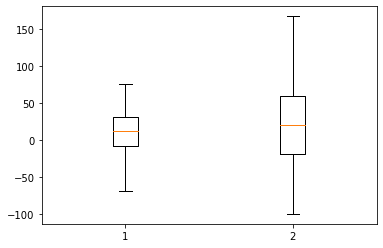

In [20]:
plt.boxplot(data)

### Задание № 2 
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат

In [21]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [58]:
from scipy.stats import mannwhitneyu
stats, pvalue = mannwhitneyu(A, B)
print(f'Stats = {stats}, Pvalue = {pvalue}')


Stats = 4343.0, Pvalue = 0.054347680446611354


#### ВЫВОД: Одинаковые распределения (Не отвергаем H0) 

In [63]:
print(f'A = {A.mean()}, B = {B.mean()}')

A = 11.345546240764518, B = 22.557496178167234


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

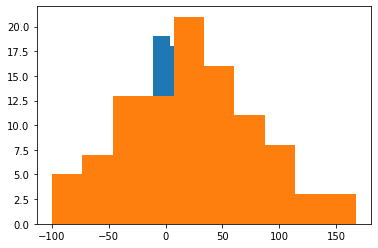

In [59]:
plt.hist(A)
plt.hist(B)

### Задание № 3

Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`

In [66]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [71]:
from scipy.stats import f_oneway

F, pvalue = f_oneway(water, nutri, mineral)
print(f'F = {F}, pvalue = {pvalue}')

F = 12.525963044834192, pvalue = 2.9240047906326866e-05


#### ВЫВОД: Распределения разные (Отклоняем Н0)

In [72]:
from scipy.stats import wilcoxon

stat, pvalue = wilcoxon(nutri, mineral)
print(f'F = {stat}, pvalue = {pvalue}')

F = 16.5, pvalue = 0.00019741058349609375


#### ВЫВОД: Разные распределения, эффект был

{'whiskers': [<matplotlib.lines.Line2D at 0x123f47d60>,
 'caps': [<matplotlib.lines.Line2D at 0x123f47610>,
 'boxes': [<matplotlib.lines.Line2D at 0x123cfd3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x123d114c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x123d114f0>,
 'means': []}

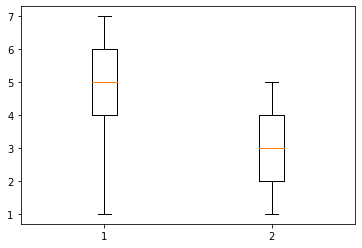

In [76]:
d = {'nutri': nutri, 'mineral': mineral}
df = pd.DataFrame(data = d)
df.head()

plt.boxplot(df)

## Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? 
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

In [77]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [82]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


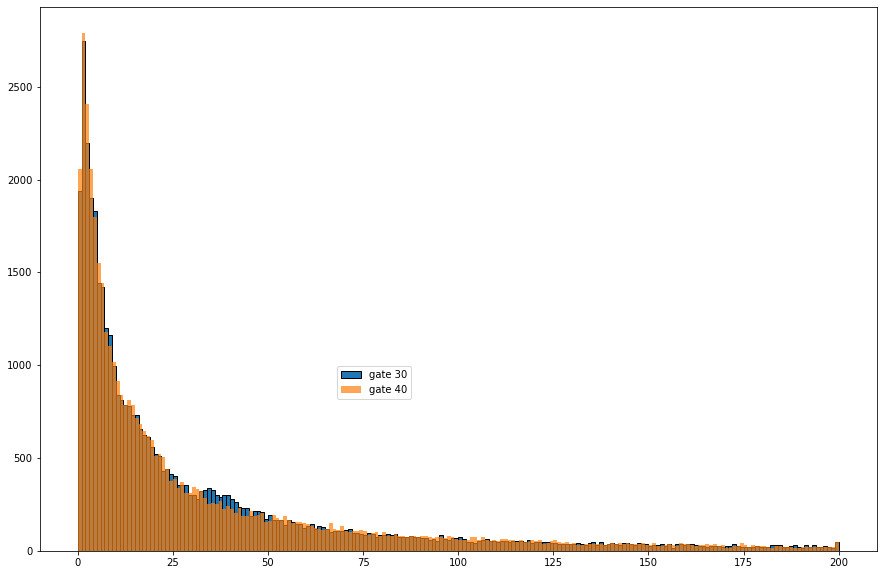

In [83]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

На основе этой визуализации мы не можем сделать вывод о том, где лучше расположить ворота.

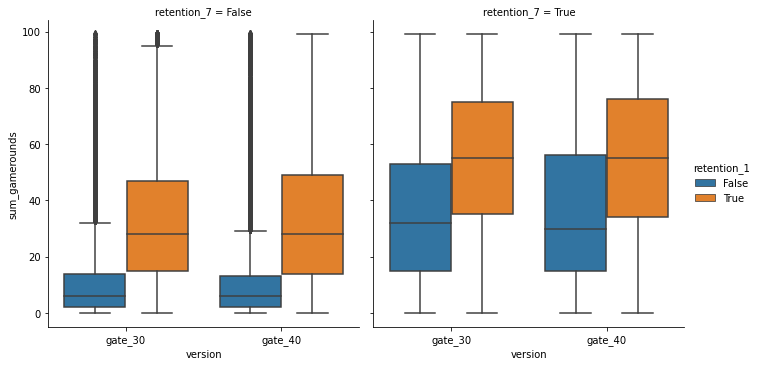

In [84]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

На основе этой визуализации мы также не можем сделать вывод о том, где лучше расположить ворота.

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

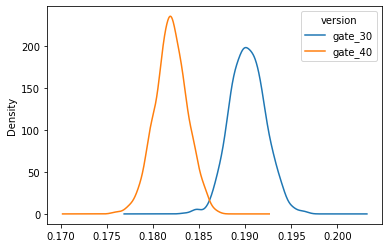

In [81]:
plt.figure(figsize=(15, 10))
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)

boot_1d.plot(kind='density')

### Вывод:

На основе визуализации можно сделать, что ворота лучше расположить на 30 уровне.

In [91]:
t, p = f_oneway (data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

In [92]:
print(f'Т-Тест = {t}, pvalue = {p}')

Т-Тест = 0.7939569526814368, pvalue = 0.3729086824696095


Распределения одинаковые (не отклоняем H0)

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [93]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задание № 1 (Обязательно):
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [179]:
df_grass = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') | (pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock'))]
df_rock = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass') | (pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass'))]

In [180]:
df_grass['Attack'].mean()

73.21428571428571

In [181]:
df_rock['Attack'].mean()

94.38095238095238

In [182]:
t, pvalue = stats.ttest_ind(df_rock['Attack'], df_grass['Attack'])
t, pvalue

(3.6867299152069792, 0.0003544849009013808)

(array([7., 5., 2., 5., 6., 4., 5., 4., 1., 3.]),
 array([ 40. ,  52.5,  65. ,  77.5,  90. , 102.5, 115. , 127.5, 140. ,
        152.5, 165. ]),
 <BarContainer object of 10 artists>)

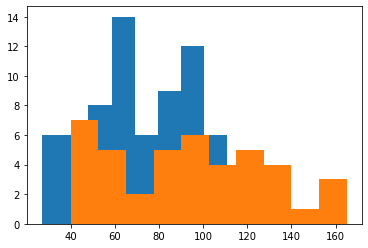

In [110]:
plt.hist(df_grass['Attack'])
plt.hist(df_rock['Attack'])

{'whiskers': [<matplotlib.lines.Line2D at 0x123d0d310>,
 'caps': [<matplotlib.lines.Line2D at 0x123ce1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x123ee7970>,
 'medians': [<matplotlib.lines.Line2D at 0x123dad220>,
 'fliers': [<matplotlib.lines.Line2D at 0x123dadb80>,
 'means': []}

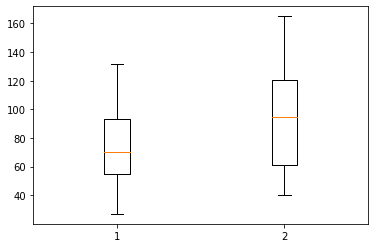

In [126]:
plt.boxplot([df_grass['Attack'], df_rock['Attack']])

### Вывод: 

По результатм t-test можно сделать вывод что распределения различны. На основе визуализации и расчета средних, можно сделать вывод, что покемоны класса  'rock' имеюи более сильную обычну атаку чем покемоны класса 'grass'.

### Задание № 2:
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [173]:
df_water = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') | (pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal'))]
df_normal = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water') | (pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water'))]

In [174]:
df_water['Speed'].mean()

65.96428571428571

In [175]:
df_normal['Speed'].mean()

71.55670103092784

In [176]:
t, pvalue = stats.ttest_ind(df_normal['Speed'], df_water['Speed'])
t, pvalue 

(1.5667760660025594, 0.11869444763401567)

(array([ 2.,  8.,  6., 17., 11., 15., 16., 12.,  7.,  3.]),
 array([  5.,  18.,  31.,  44.,  57.,  70.,  83.,  96., 109., 122., 135.]),
 <BarContainer object of 10 artists>)

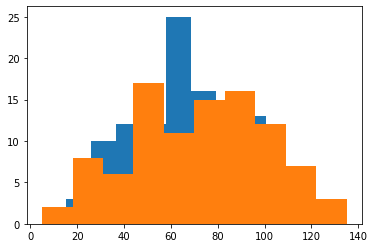

In [177]:
plt.hist(df_water['Speed'])
plt.hist(df_normal['Speed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x122253340>,
 'caps': [<matplotlib.lines.Line2D at 0x122253a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x124466fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x124fe0100>,
 'fliers': [<matplotlib.lines.Line2D at 0x124fe0460>,
 'means': []}

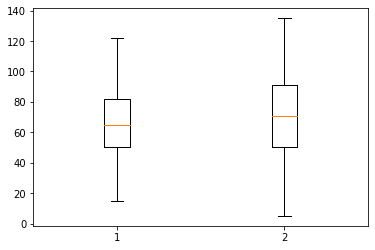

In [178]:
plt.boxplot([df_water['Speed'], df_normal['Speed']])


### Вывод

На основе значение pvalue можно сделать вывод, что результат случаен. В среднем поенмоны этих классов имеют 
приблизительно равную скорость передвижения.

### Задание № 3:
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

### Задание № 5:
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

### Сумма

In [133]:
pokemon['sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']

In [144]:
df_legendary = pokemon[pokemon['Legendary'] == True]
df_legendary.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000


In [148]:
df_s1mple = pokemon[pokemon['Legendary'] == False]
df_s1mple.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [138]:
df_legendary['sum'].mean()

309.0769230769231

In [139]:
df_s1mple['sum'].mean()

214.4108843537415

In [140]:
t, pvalue = stats.ttest_ind(df_legendary['sum'], df_s1mple['sum'])
t, pvalue

(11.591852366462316, 7.970942205722087e-29)

{'whiskers': [<matplotlib.lines.Line2D at 0x122b1a160>,
 'caps': [<matplotlib.lines.Line2D at 0x123f20fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x122b1a490>,
 'medians': [<matplotlib.lines.Line2D at 0x123f28610>,
 'fliers': [<matplotlib.lines.Line2D at 0x123f28c10>,
 'means': []}

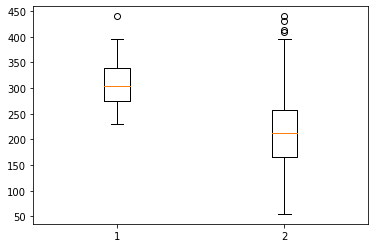

In [141]:
plt.boxplot([df_legendary['sum'], df_s1mple['sum']])

### Произведение

In [145]:
pokemon['prz'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [146]:
df_legendary['prz'].mean()

1085941.6153846155

In [149]:
df_s1mple['prz'].mean()

425041.38911564625

In [150]:
t, pvalue = stats.ttest_ind(df_legendary['prz'], df_s1mple['prz'])
t, pvalue

(13.263253408231844, 1.992664308842282e-36)

{'whiskers': [<matplotlib.lines.Line2D at 0x122e70f10>,
 'caps': [<matplotlib.lines.Line2D at 0x122e0a3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x122e701f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1232f4790>,
 'fliers': [<matplotlib.lines.Line2D at 0x124d8c730>,
 'means': []}

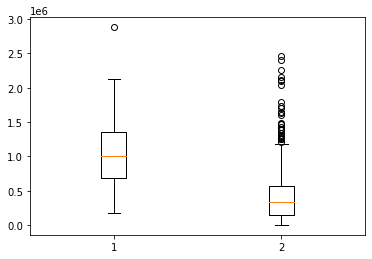

In [151]:
plt.boxplot([df_legendary['prz'], df_s1mple['prz']])

### Вывод:

На основе pvalue делаем вывод, что распределения различны. Действительно, легендарные покемоны обладают повышенными характеристиками.

### Задание № 6:
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.



In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

In [163]:
df_rock = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
df_rock.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,220,320000
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False,265,600875
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False,330,1248000
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,240,252000
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False,260,646000


In [161]:
df_ground = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
df_ground.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210,318750
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,269,720360
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,260,636174
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90,13750


In [166]:
df_steel = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 1'] == 'Steel')]
df_steel.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
223,224,Steelix,Steel,Ground,75,85,200,55,65,30,False,360,1275000
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,False,430,2156250
245,246,Skarmory,Steel,Flying,65,80,140,40,70,70,False,285,728000
328,329,Mawile,Steel,Fairy,50,85,85,55,55,50,False,220,361250
329,330,Mega Mawile,Steel,Fairy,50,105,125,55,95,50,False,280,656250


In [167]:
df_ice = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 1'] == 'Ice')]
df_ice.head(5)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,prz
133,134,Jynx,Ice,Psychic,65,50,35,115,95,95,False,150,113750
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
238,239,Swinub,Ice,Ground,50,50,40,30,30,50,False,140,100000
239,240,Piloswine,Ice,Ground,100,100,80,60,60,50,False,280,800000
243,244,Delibird,Ice,Flying,45,55,45,65,45,75,False,145,111375


In [170]:
F, pvalue = f_oneway(df_rock['Defense'], df_ground['Defense'], df_steel['Defense'], df_ice['Defense'])
F, pvalue 

(13.640196902166172, 8.767265927038969e-08)

{'whiskers': [<matplotlib.lines.Line2D at 0x1247c9eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1247c9850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1247c93a0>,
 'medians': [<matplotlib.lines.Line2D at 0x124da25e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x124da2f10>,
 'means': []}

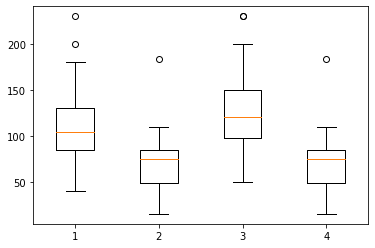

In [171]:
plt.boxplot([df_rock['Defense'], df_ground['Defense'], df_steel['Defense'], df_ice['Defense']])

### Вывод

Распределения различны (отклоняем H0)